## Big-Four Teams of Formula 1

Since F1's inception more than 50 years ago, many drivers and teams have competed in the championship. The World Constructor Championship (WCC) points and standings for four major teams are represented in the visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

url_f = 'https://en.wikipedia.org/wiki/Ferrari_Grand_Prix_results'
ferrari_tables = pd.read_html(url_f)
url_m = 'https://en.wikipedia.org/wiki/McLaren_Grand_Prix_results'
mclaren_tables = pd.read_html(url_m)
url_me = 'https://en.wikipedia.org/wiki/Mercedes-Benz_Grand_Prix_results'
mercedes_tables = pd.read_html(url_me)
url_r = 'https://en.wikipedia.org/wiki/Red_Bull_Racing_Grand_Prix_results'
redbull_tables = pd.read_html(url_r)

In [2]:
ferrari = pd.DataFrame()
df = pd.DataFrame()
for i in [1, 2, 3, 4, 5, 6, 7]:
    df = ferrari_tables[i]
    df = df.loc[:, ['Year', 'Points', 'WCC']]
    df.columns = ['Year', 'Points', 'WCC']
    df['Year'] = df['Year'].str.extract(pat = '([0-9]*)')
    df['WCC'] = df['WCC'].str.extract(pat = '([0-9]*)')
    df['Points'] = df['Points'].str.extract(pat = '([0-9]*)')
    ferrari = pd.concat([ferrari, df])
    ferrari.drop_duplicates(inplace = True)
    ferrari.dropna(inplace=True)
    
ferrari = ferrari.loc[~(ferrari['Points']== '')]
ferrari.reset_index(inplace=True)
ferrari.drop(['index'], axis=1, inplace=True)
ferrari['Points'] = ferrari['Points'].apply(lambda x : pd.to_numeric(x))
ferrari['WCC'] = ferrari.loc[:,'WCC'].astype(int)
ferrari['Total Points']=ferrari['Points'].expanding().sum()

In [3]:
mclaren = pd.DataFrame()
df = pd.DataFrame()
for i in [0, 1, 2, 3, 4, 5, 6]:
    df = mclaren_tables[i]
    if i == 6:
        df = df.loc[:, ['Year', 'Points', 'WCC']]
    else:
        x = len(df.columns)
        df = df.iloc[:, [0,(x-2), (x-1)]]
    df.columns = ['Year', 'Points', 'WCC']
    df['Year'] = df['Year'].str.extract(pat = '([0-9]*)')
    df['WCC'] = df['WCC'].str.extract(pat = '([0-9]*)')
    df['Points'] = df['Points'].str.extract(pat = '([0-9]*)')
    mclaren = pd.concat([mclaren, df])
    mclaren.drop_duplicates(inplace = True)
    mclaren.dropna(inplace=True)
    
mclaren = mclaren.loc[~(mclaren['Points']== '')]
mclaren = mclaren.loc[~(mclaren['WCC']== '')]
mclaren.reset_index(inplace=True)
mclaren.drop(['index'], axis=1, inplace=True)
mclaren['Points'] = mclaren.loc[:,'Points'].apply(lambda x : pd.to_numeric(x))
mclaren['WCC'] = mclaren['WCC'].astype(int)
mclaren['Total Points']=mclaren.loc[:,'Points'].expanding().sum()

In [4]:
mercedes = pd.DataFrame()
df = pd.DataFrame()
for i in [2, 3]:
    df = mercedes_tables[i]
    df = df.loc[:, ['Year', 'Points', 'WCC']]
    df.columns = ['Year', 'Points', 'WCC']
    df['Year'] = df['Year'].str.extract(pat = '([0-9]*)')
    df['WCC'] = df['WCC'].str.extract(pat = '([0-9]*)')
    df['Points'] = df['Points'].str.extract(pat = '([0-9]*)')
    mercedes = pd.concat([mercedes, df])
    mercedes.drop_duplicates(inplace = True)
    mercedes.dropna(inplace=True)
    
mercedes = mercedes.loc[~(mercedes['Points']== '')]
mercedes.reset_index(inplace=True)
mercedes.drop(['index'], axis=1, inplace=True)
mercedes['Points'] = mercedes['Points'].apply(lambda x : pd.to_numeric(x))
mercedes['WCC'] = mercedes['WCC'].astype(int)
mercedes['Total Points']=mercedes['Points'].expanding().sum()

In [5]:
redbull = pd.DataFrame()
df = pd.DataFrame()
for i in [0, 1, 2]:
    df = redbull_tables[i]
    df = df.loc[:, ['Year', 'Points', 'WCC']]
    df.columns = ['Year', 'Points', 'WCC']
    df['Year'] = df['Year'].astype(str)
    df['Points'] = df['Points'].astype(str)
    df['Year'] = df['Year'].str.extract(pat = '([0-9]*)')
    df['WCC'] = df['WCC'].str.extract(pat = '([0-9]*)')
    df['Points'] = df['Points'].str.extract(pat = '([0-9]*)')
    redbull = pd.concat([redbull, df])
    redbull.drop_duplicates(inplace = True)
    redbull.dropna(inplace=True)
    
redbull = redbull.loc[~(redbull['Points']== '')]
redbull.reset_index(inplace=True)
redbull.drop(['index'], axis=1, inplace=True)
redbull['Points'] = redbull['Points'].apply(lambda x : pd.to_numeric(x))
redbull['WCC'] = redbull['WCC'].astype(int)
redbull['Total Points']=redbull['Points'].expanding().sum()

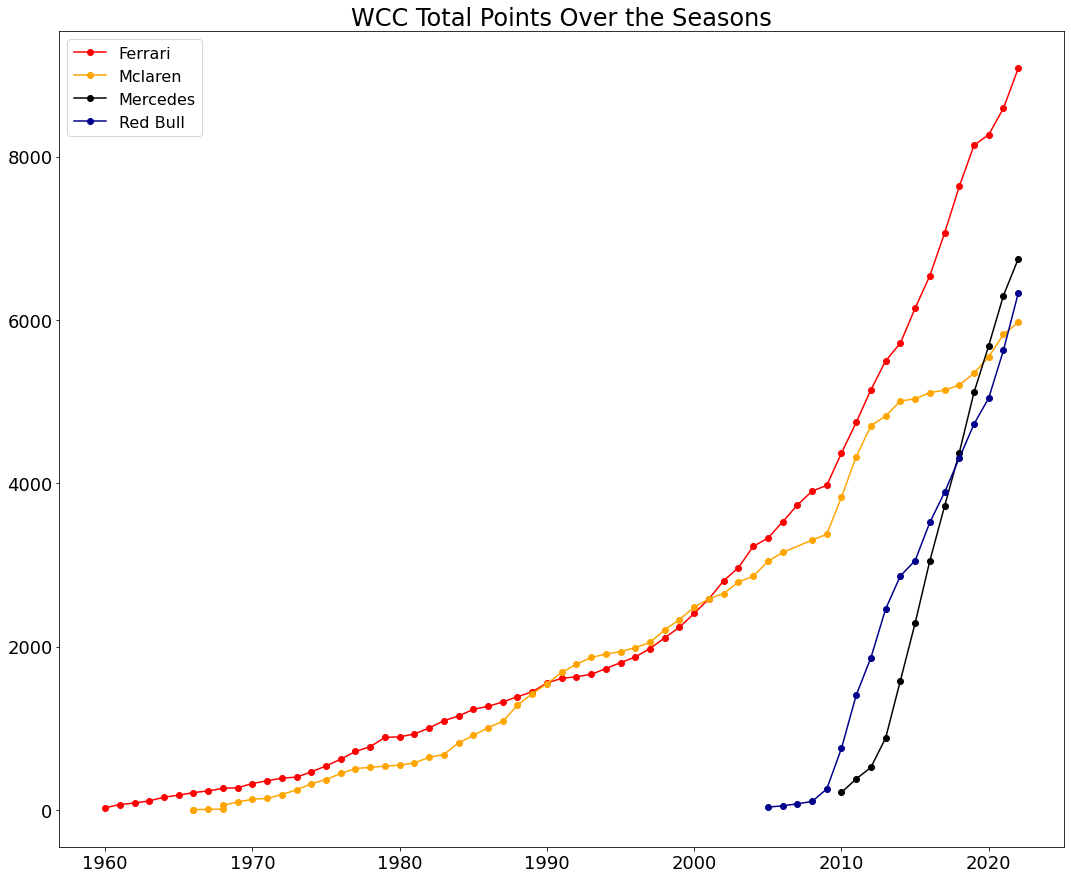

In [6]:
plt.figure(figsize = [18,15])
plt.plot(ferrari['Year'], ferrari['Total Points'], 'o-', label='Ferrari', color='red')
plt.plot(mclaren['Year'], mclaren['Total Points'],'o-', label='Mclaren', color='orange')
plt.plot(mercedes['Year'], mercedes['Total Points'],'o-', label='Mercedes', color='black')
plt.plot(redbull['Year'], redbull['Total Points'],'o-', label='Red Bull', color='darkblue')
plt.title('WCC Total Points Over the Seasons', fontsize=24)
plt.tick_params(labelsize=18)
plt.xticks(['1960', '1970', '1980', '1990', '2000', '2010', '2020'])
plt.legend(loc=2, fontsize=16)
plt.show()

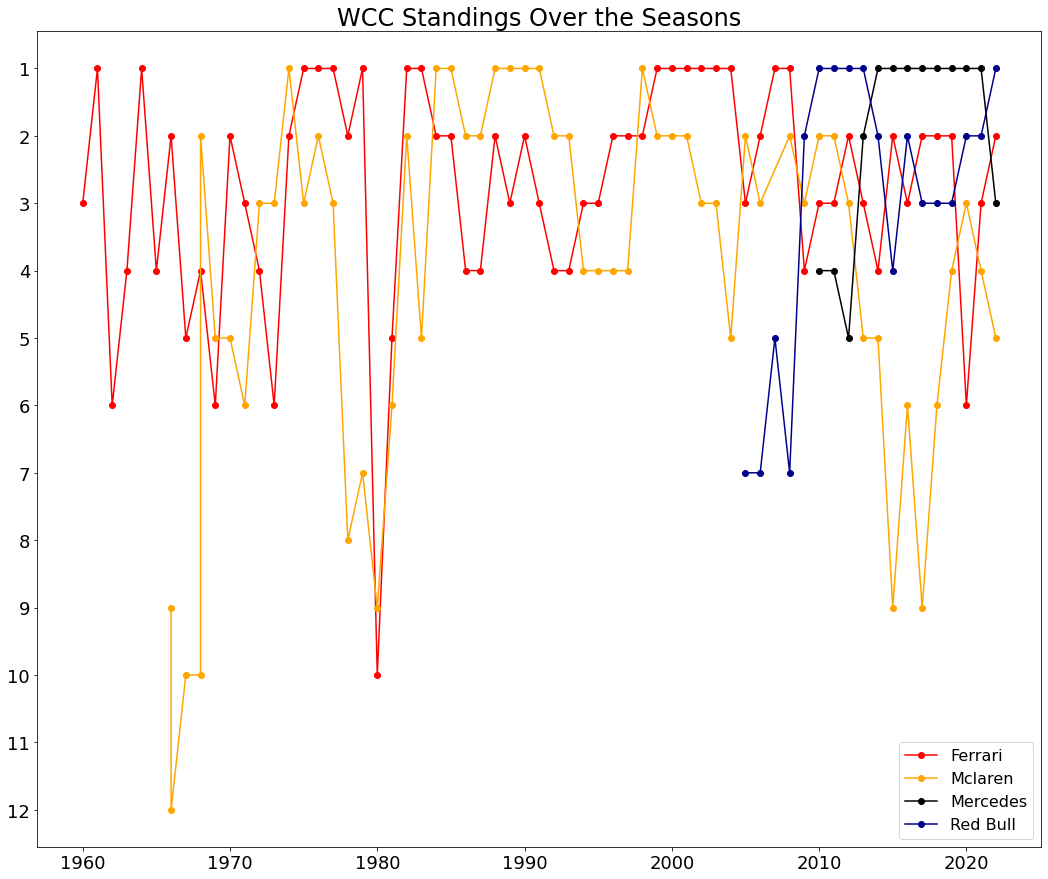

In [7]:
plt.figure(figsize = [18,15])
plt.plot(ferrari['Year'], ferrari['WCC'], 'o-', label='Ferrari', color='red')
plt.plot(mclaren['Year'], mclaren['WCC'], 'o-', label='Mclaren', color='orange')
plt.plot(mercedes['Year'], mercedes['WCC'], 'o-', label='Mercedes', color='black')
plt.plot(redbull['Year'], redbull['WCC'], 'o-', label='Red Bull', color='darkblue')
plt.title('WCC Standings Over the Seasons', fontsize=24)
plt.tick_params(labelsize=18)
plt.legend(loc=2, fontsize=18)
plt.legend(loc=4, fontsize=16)
plt.xticks(['1960', '1970', '1980', '1990', '2000', '2010', '2020'])
plt.yticks(np.arange(1, 13, step=1))
plt.gca().invert_yaxis()
plt.show()

Ferrari is the oldest team in Formula One racing and has the most WCC points and WCC victories. McLaren and Mercedes have the same number of titles, but Mercedes is the second team with the most points. Red Bull is the second youngest team and is the third team with the most points. Red Bull has the least number of titles among these four teams. Until mid 2000s, Ferrari and Mclaren in a close competition. After mid 2000s, Red Bull and Mercedes teams were at the forefront of the competition.
